In [2]:
import numpy as np
from matplotlib import pyplot as plt
from functools import partial
from ionoptics import geometry as geo
from ionoptics import beamline as bl
from ionoptics import bmad

In [3]:
# beamsize
##JULIC
### 1 sigma x = 6 mm
### 1 sigma y = 9 mm

##HBS LINAC
### diameter ~ 10 mm (6 sigma)
### 1 sigma = 1.5 mm

sigma_x = 1.5e-3

## quadrupole position evaluation

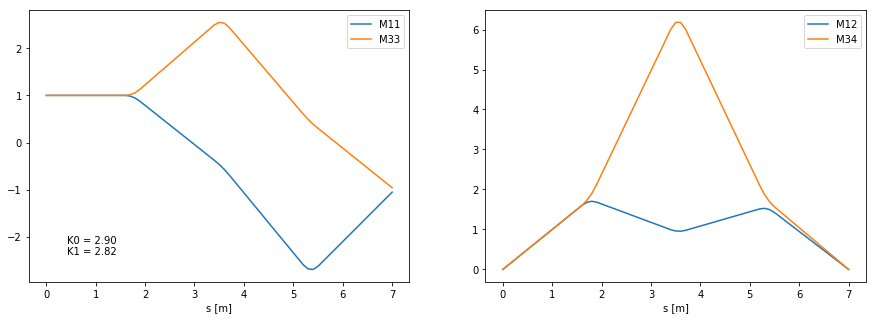

total length:  7.1


In [104]:
l = 1.6 # from object to 1st q
L = 0.3 # q thickness
d = 1.5 # dist. betw. q's

k0,k1 = bl.opt_trip(l,L,d,[2,3])

lengths = [l,L,d,L,d,L,l]
elements = [bl.drift,partial(bl.qf, k=k0),bl.drift,partial(bl.qdf, k=k1),bl.drift,partial(bl.qf, k=k0),bl.drift]

axes = bl.plot_M_vs_s(elements,lengths,figsize = (15,5))

axes[0].text(0.1,0.1,'K0 = {:.2f}\nK1 = {:.2f}'.format(k0,k1),transform=axes[0].transAxes)

#PATH_TO_DATA = '../../Multiplexer/Plots/'
#FILENAME = 'QT_eval-1Kicker-{}_{}_{}'.format(l,d,L)
#plt.savefig(PATH_TO_DATA + FILENAME, format = 'png', dpi=900)

plt.show()

print('total length: ', round(2*l+2*d+3*L,2))

### bmad cross check

xmax @  start: 0.005244586985047786
xmax @  end: 0.006006385675519147
ymax @  start: 0.008537206158219044
ymax @  end: 0.008652638139194627


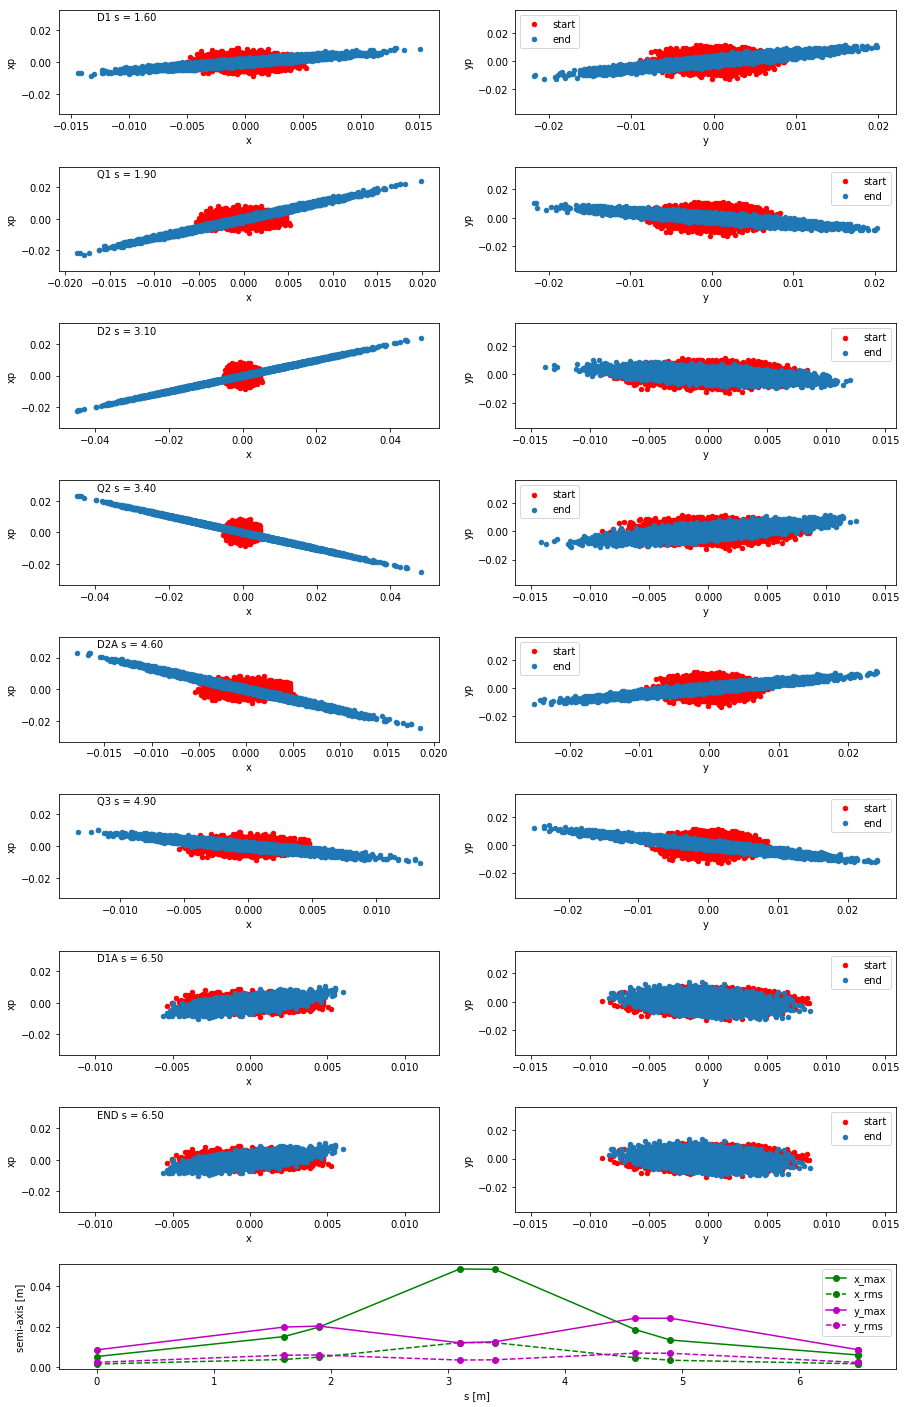

In [24]:
df = bmad.txt_to_df('../../Bmad/Playground/production/bin/','tracking_ele.txt')
bmad.plot_phase_space(df,figsize=(15,25))

#PATH_TO_DATA = '../../Multiplexer/Plots/'
#FILENAME = 'pure_tr-{}_{}_{}_sigmax{}'.format(l,d,L,sigma_x)
#plt.savefig(PATH_TO_DATA + FILENAME, format = 'png', dpi=900)

plt.show()

## kick-septum angle evaluation - 1 kicker setup

In [190]:
## beam parameters
Thet_init = 0

## distances
l_object = 0.2 # 1st q to kicker
l_kick = 1
l_sept = 0.5

lkq = d-l_kick-l_object
l_max = d + L + lkq # d: from q to q
l_max = 3 # manually set / w/o qs
## vertical distances
x_init = 0

# at septum
septum = 3e-3
x_sept = 4*sigma_x+septum
# at max prop
x_at_max_prop = 0.5
x_add = x_at_max_prop-x_sept

sept_type = 'DC'

## iteration

start_kick = 0.001 # smallest kick-angle
step_kick = 0.001 # step size kick-angle

list_perm = np.linspace(0,1,1001) # range of septum angles

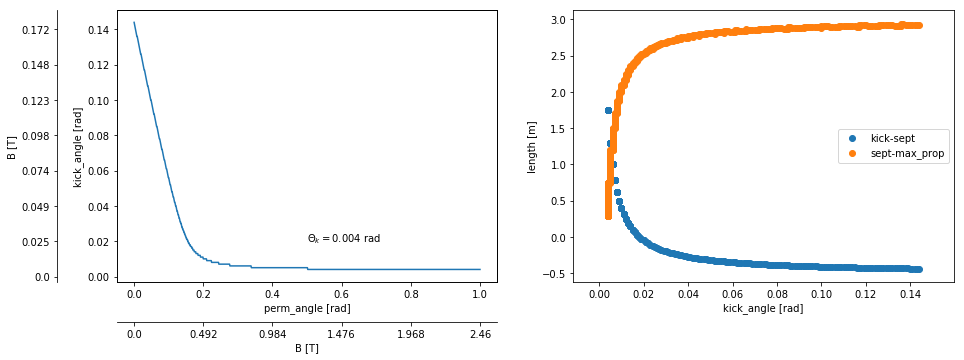

3


In [200]:
ax,data= geo.plot_comb_kick_sept(x_sept,
                                 x_add,
                                 x_init,
                                 Thet_init,
                                 l_kick,
                                 l_sept,
                                 sept_type,
                                 start_kick,
                                 step_kick,
                                 list_perm,
                                 l_max,
                                 brho=1.23,
                                 figsize = (15,5)
                                )


PATH_TO_DATA = '../../Multiplexer/Plots/'
FILENAME = 'ang_eval-1Kicker-{}_{}_{}_simgax{}'.format(l_max,x_at_max_prop,sept_type,sigma_x)
plt.savefig(PATH_TO_DATA + FILENAME, format = 'png', dpi=900, bbox_inches="tight")

plt.show()
print(l_max)

In [199]:
kick_d = data[0][0.4]

dks = [d[1] for d in data[1] if d[0] == kick_d]
dks_av = sum(dks)/len(dks)
# kicker-septum


dsf = [d[1] for d in data[2] if d[0] == kick_d]
dsf_av = sum(dsf)/len(dsf)
# septum - final

(kick_d,dks_av,dsf_av)

(0.005, 1.3000054166824666, 0.9444701518353464)

## reduced kicker strength by quadrupole

In [195]:
kick_d*dks_av+l_kick*kick_d/2

0.009000027083412333

In [196]:
kick_d*lkq+l_kick*kick_d/2

0.004

In [182]:
reduced = kick_d - 0.3e-3

if (dks_av-lkq-L)>=0:
    total_defl = geo.quad_defl(k1,0.3,reduced,l_kick,lkq,dks_av-lkq-L)
    if total_defl >= (kick_d*dks_av+l_kick*kick_d/2):
        print('kicker-quad:', lkq)
        print('quad-septum:', dks_av-lkq-L)
        print(total_defl)
else:
    print('not working!:', dks_av-lkq-L)

kicker-quad: 0.3
quad-septum: 0.18572070241763472
0.009131285464014505


## electric deflection

In [186]:
def E_field(Theta,l,Brho,beta):
    
    E = Theta*beta*3e8*Brho/l
    
    return E/1e6

In [197]:
E_field(5e-3,1,1.23,0.36)

0.6642